# Exploration of Etsy Listing Data for Artificial Crepe Paper Flower Products
### by Kristina Frazier

## Preliminary Wrangling

This project explores listing data from the Etsy.com API. Specifically, I extracted listings for artificial crepe paper flower products from Etsy.com in July 2020 in order to learn more about the artifical crepe paper flower market. Specifically, I wanted to know more about this market in otder maximize sales for my own Etsy shop: CrepeFloret. CrepeFloret is one of many Etsy shops that sells faux flower arrangements made of crepe paper. Insights uncovered from an analysis of listing data from competing shops may result in a competitive edge for CrepeFloret. I extracted and cleaned this data myself using SQL and Python. The datasets loaded below are the result of previous work done to restructure the raw data into clean and tidy datasets.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
listings = pd.read_csv('data/all_main_data_clean.csv')
listing_materials = pd.read_csv('data/all_materials_data_clean.csv')
listing_tags = pd.read_csv('data/all_tag_data_clean.csv')

In [3]:
# high-level overview of data shape and composition
print(listings.shape)
print(listings.dtypes)

(4750, 9)
listing_id       float64
title             object
description       object
price            float64
currency_code     object
quantity         float64
views            float64
num_favorers     float64
when_made         object
dtype: object


In [4]:
listings.head()

,listing_id,title,description,price,currency_code,quantity,views,num_favorers,when_made
0,648739494.0,10 Sheets Of Tissue Paper Crisp White Acid Fre...,"This lovely crisp, white tissue paper is acid ...",2.99,GBP,9.0,449.0,32.0,2010_2019
1,573652142.0,"Vintage Christmas Accordion Bell, Vintage Red ...","Vintage Christmas Accordion Bell, Vintage Red ...",6.97,USD,2.0,93.0,12.0,1950s
2,770666856.0,"Pink floral arrangement, paper flowers in a ca...",A floral arrangement of pink paper flowers del...,47.00,EUR,1.0,107.0,15.0,made_to_order
3,275256894.0,Bouquet - bouquet - rose crepe paper - bouque...,Very beautiful and elegant bouquet of six rose...,20.00,EUR,10.0,423.0,32.0,made_to_order
4,289433355.0,wedding pinata - pinata wedding - roses pinata...,"Large pinata , height of about 12 inch. Entire...",65.00,EUR,10.0,674.0,52.0,made_to_order


In [5]:
listing_materials.head()

,listing_id,materials
0,648739494.0,NaN
1,573652142.0,NaN
2,770666856.0,paper
3,770666856.0,cardboard
4,770666856.0,covered wire


In [6]:
listing_tags.head()

,listing_id,tags
0,648739494.0,gift box filling
1,648739494.0,gift box wrapping
2,648739494.0,soft tissue paper
3,648739494.0,acid free paper
4,648739494.0,scrapbook paper


### What is the structure of your dataset?

This dataset is actually comprised of three seperate tables which can all be joined together using a common "listing_id" column. I extracted this data from the Etsy API using various key word searches to only extract the latest crepe paper flower listings. 

Most data related to the listing description of each individual product is located in the "listings" dataframe. For the sake of tidiness, there are separate dataframes for information related to materials and tags (these are both marketplace search terms used to increase the visibility of each listing if they match buyer search times) because these data sometimes repeat listing ids. For example, one listing can have multiple materials listed.

The main listings dataset has 4750 listings with 9 variables, split between text and numeric variables.

### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in how the price of each listing relates to other features that may maximize the price of a certain product.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I would like to compare the price of products along certain categories, such as whether or not the product is pre-made or made to order, or if the product is meant for wedding celebrations or for simple home decoration or gifts. I predict that these features will be related to the price of the product.

## Univariate Exploration

''

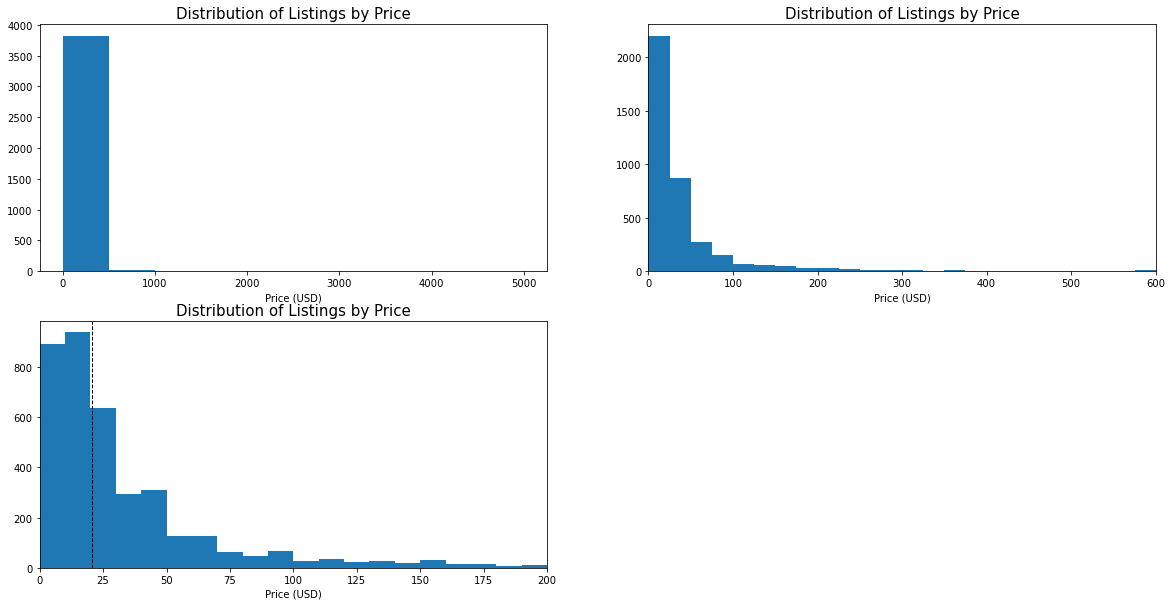

In [7]:
# Explore price data

# Isolate dataset for only price data in USD

listings = listings.query('currency_code == "USD"')

plt.figure(figsize = [20,10])

# Initial subplot
plt.subplot(2,2,1)
plt.hist(data = listings, x = 'price')
plt.xlabel('Price (USD)')
plt.title('Distribution of Listings by Price', fontsize=15)

# Removing outlier data
bins = np.arange(0,650,25)
plt.subplot(2,2,2)
plt.hist(data = listings, x = 'price', bins = bins)
plt.xlabel('Price (USD)')
plt.title('Distribution of Listings by Price', fontsize=15)
plt.xlim(0,600)

# Removing outlier data
bins = np.arange(0,250,10)
plt.subplot(2,2,3)
plt.hist(data = listings, x = 'price', bins = bins)
plt.xlabel('Price (USD)')
plt.title('Distribution of Listings by Price', fontsize=15)
plt.xlim(0,200)
plt.axvline(listings['price'].median(), color='k', linestyle='dashed', linewidth=1)
;

In [8]:
listings.price.describe()

count    3852.000000
mean       48.298624
std       133.875408
min         0.980000
25%        10.325000
50%        20.750000
75%        48.000000
max      4999.900000
Name: price, dtype: float64

The price data is heavily right skewed. As is seen with .describe(), the majority of listings are between $10 and $50 dollars. Going forward, I will analyze a subset of this data for all listings up to $200.00. Specficially, for this subset of data, I want to next look at the avaiability of occasion, material, and tag data for this subset of data.

In [9]:
# Subset the data for only listings up to $200
listings_sub = listings.copy().query('0 < price <= 200')

# Subset the remaining datasets
listings_sub_materials = listing_materials[listing_materials['listing_id'].isin(listings_sub.listing_id)]
listings_sub_tags = listing_tags[listing_tags['listing_id'].isin(listings_sub.listing_id)]

#### Explore Materials Dataset

In [10]:
# There are too many materials to view the distribution of them all, so I will select only the top 20
top_materials = listings_sub_materials['materials'].str.lower().value_counts().iloc[:20]
top_materials = top_materials.reset_index(name = 'count')
top_materials = top_materials.rename(columns = {'index':'material'})
top_materials

,material,count
0,crepe paper,2125
1,wire,849
2,paper,616
3,glue,331
4,floral tape,175
5,italian crepe paper,126
6,metal stems,125
7,ribbon,120
8,paper flower bouquet,119
9,floral wire,116


''

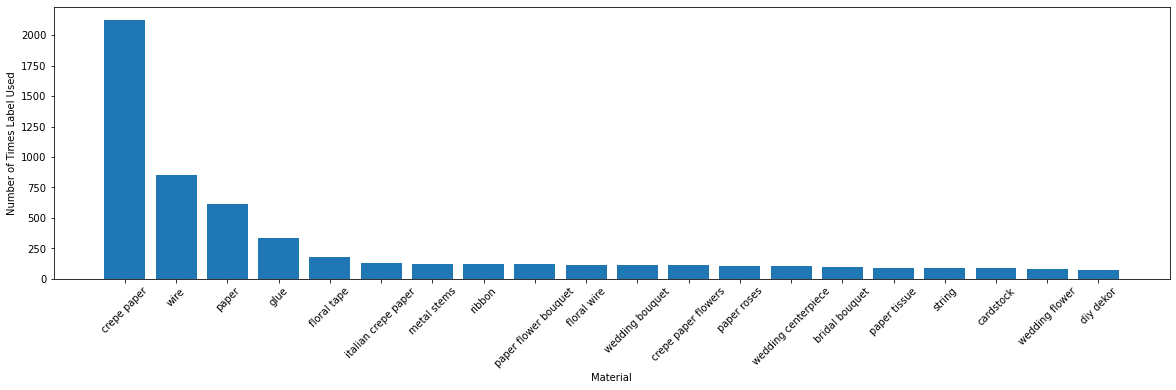

In [11]:
# Visualize the shape of the distribution of materials data
plt.figure(figsize = [20,5])
plt.bar(data = top_materials, x = 'material', height = 'count', color = sb.color_palette()[0])
plt.xlabel('Material')
plt.ylabel('Number of Times Label Used')
plt.xticks(rotation = 45)
;

This data is right skewed, which may indicate that the listers do not use a variety of different types of materials labels in their listings - it looks like they are mostly likely to simply use the material tag "crepe paper" than any other type of tag. I will try to confirm this in the next plot.

In [12]:
# See distribution of number of tags per listing
materials_by_list = listings_sub_materials.groupby('listing_id').size()
materials_by_list = materials_by_list.reset_index(name = 'count')
materials_by_list

,listing_id,count
0,17069328.0,1
1,26667564.0,1
2,31344520.0,2
3,34402837.0,1
4,34402980.0,1
...,...,...
3713,834316917.0,1
3714,834527529.0,4
3715,834682025.0,3
3716,834746759.0,1


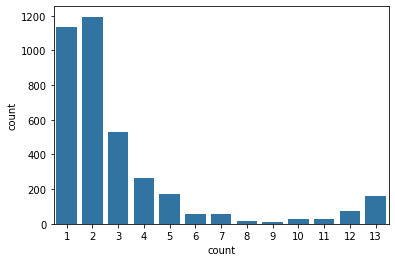

In [13]:
sb.countplot(data = materials_by_list, x = 'count', color = sb.color_palette()[0]);

> As suspected, listings most often use 2 or 1 material tags.

In [14]:
# And what's the most common single tag?
single_tags = materials_by_list[materials_by_list['count'] == 1]
listings_sub_materials[listings_sub_materials['listing_id'].isin(single_tags['listing_id'])]['materials'].value_counts()

crepe paper                                  242
Paper                                        181
paper                                         57
Premium Quality Crepe Paper                   37
Crepe Paper                                   21
                                            ... 
Photo backdrop                                 1
Silk                                           1
vinyl                                          1
Framed Vintage 1920 Halloween Pumpkin          1
Vintage Crepes Tissue Paper Wedding Bells      1
Name: materials, Length: 66, dtype: int64

The most common single tag is indeed "crepe paper"

#### Explore 'When Made' Data
The 'when_made' column is most used by listers to distinguise between crafts that they've already produced and have posted for sale, or crafts that they will make on demand when customers order the product.

In [15]:
listings_sub['when_made'].value_counts()

made_to_order    2030
2010_2019         717
2020_2020         462
1950s              84
1920s              73
before_2001        72
2001_2009          60
1960s              58
1940s              51
1930s              27
1980s              27
1970s              24
1990s              10
False               7
1900s               5
1910s               5
1800s               5
2000_2000           1
Name: when_made, dtype: int64

It's interesting to see that the vast majority of products are "made_to_order" - but there are also some vintage products.

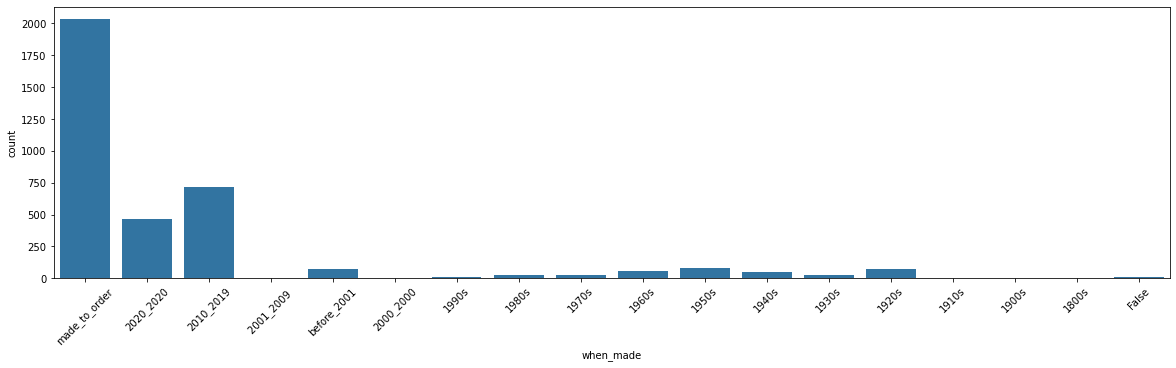

In [16]:
# Convert 'when_made' to an ordered category data type
when_made = ['made_to_order','2020_2020','2010_2019','2001_2009 ','before_2001','2000_2000','1990s','1980s','1970s',
             '1960s','1950s','1940s','1930s','1920s','1910s','1900s','1800s','False']

madeclasses = pd.api.types.CategoricalDtype(ordered = True, categories = when_made)

listings_sub['when_made'] = listings_sub['when_made'].loc[:].astype(madeclasses)

# Plot the distribution of when_made categories
plt.figure(figsize = [20,5])
sb.countplot(data = listings_sub, x = 'when_made', color = sb.color_palette()[0])
plt.xticks(rotation = 45);

This confirms that most products are made_to_order - but it's also interesing to see some products made in the early 2000s, which may be descriptive of the time period of the trend for making artificial flowers from crepe paper

#### Explore Number of Favorers and Views Data

In [17]:
listings_sub.head()

,listing_id,title,description,price,currency_code,quantity,views,num_favorers,when_made
1,573652142.0,"Vintage Christmas Accordion Bell, Vintage Red ...","Vintage Christmas Accordion Bell, Vintage Red ...",6.97,USD,2.0,93.0,12.0,1950s
6,603071001.0,Crepe paper peonies stem Paper anniversary Peo...,Perfect for any occasion! A great way to make ...,30.00,USD,2.0,388.0,41.0,made_to_order
7,672229650.0,Set of 3 Purple Paper Helleborus - Paper Flowe...,Freshen up and brighten your home or office wi...,68.00,USD,1.0,122.0,21.0,2020_2020
8,585898784.0,Snowdrops Bouquet - Crepe Paper Flowers - Pape...,Freshen up and brighten your home or office wi...,98.00,USD,1.0,1170.0,40.0,2010_2019
9,585836036.0,Set of 3 Pink Open Paper Ranunculus - Pink Ran...,The Ranunculus Paper Flowers are suitablе to b...,45.00,USD,1.0,170.0,13.0,2010_2019


In [18]:
listings_sub.views.describe()

count     3718.000000
mean       434.294244
std       1745.710214
min          0.000000
25%         18.000000
50%         78.000000
75%        297.000000
max      45850.000000
Name: views, dtype: float64

In [19]:
np.log10(listings_sub.views.describe())
# Throws an error because the minumum is 0, and Log base 10 of 0 is undefined

/Users/kristinafrazier/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.570309
mean     2.637784
std      3.241972
min          -inf
25%      1.255273
50%      1.892095
75%      2.472756
max      4.661339
Name: views, dtype: float64

''

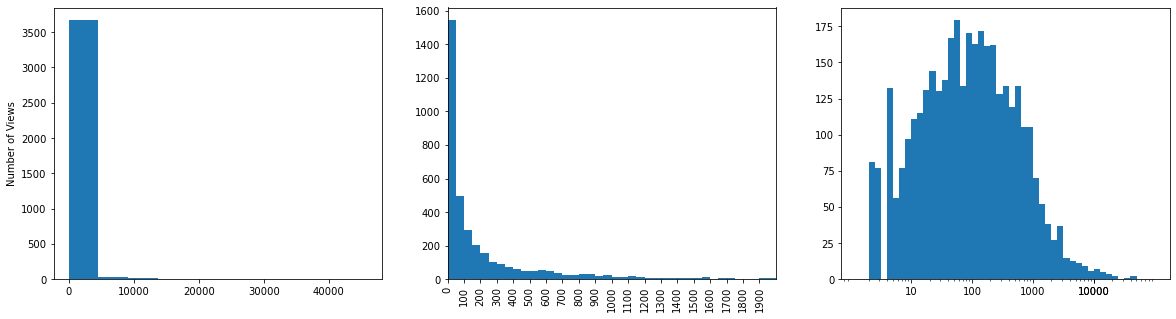

In [20]:
# Distribution of Views
plt.figure(figsize = [20,5])

# All Data
plt.subplot(1,3,1)
plt.hist(data = listings_sub, x = 'views')
plt.ylabel('Number of Views')

# Subset of data
plt.subplot(1,3,2)
bins = np.arange(0,2000+100,50)
ticks = np.arange(0,2000,100)
plt.hist(data = listings_sub, x = 'views', bins = bins)
plt.xlim(0,2000)
plt.xticks(ticks,rotation = 90)

# Log transformation
plt.subplot(1,3,3)
bins = 10 ** np.arange(0.1, 5+0.1, 0.1)
plt.hist(data = listings_sub, x = 'views', bins = bins)
ticks = [10, 100, 1000, 10000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
;

 With the log transformation, it's easier to visualize the mean number of views to be around Log10 Base 2, which is around 200 views. But the linear plots show that the majority of listings had about 50 views.

There could be several reasons by there is a right skew to this data. Most listings have less views - but I cannot tell if this is because some products are just naturally more attractive to searchers of the Etsy marketplace, or if it's because there is a recency bias in the data - having more listings in this dataset which are more recently posted. And unfortunately, I did not extract original listing date (I'm not even sure that the Etsy API provides this data at all). The latter conclusion would be supported by seeing the distribution of listings by length of time listed in the marketplace.

In [21]:
listings_sub.num_favorers.describe()

count    3718.000000
mean       52.816030
std       175.035524
min         0.000000
25%         2.000000
50%         9.000000
75%        26.000000
max      2464.000000
Name: num_favorers, dtype: float64

In [22]:
np.log10(listings_sub.num_favorers.describe())
# The minumum is 0, and Log base 10 of 0 is undefined

count    3.570309
mean     1.722766
std      2.243126
min          -inf
25%      0.301030
50%      0.954243
75%      1.414973
max      3.391641
Name: num_favorers, dtype: float64

''

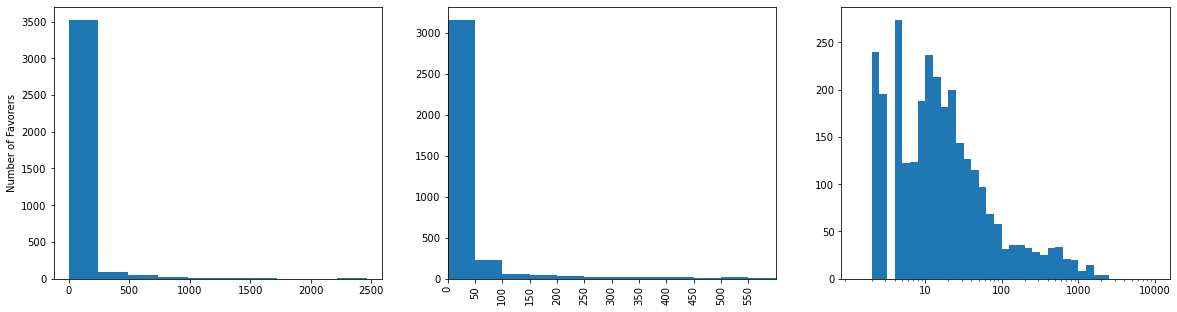

In [23]:
# Distribution of Num_Favorers
plt.figure(figsize = [20,5])

# All Data
plt.subplot(1,3,1)
plt.hist(data = listings_sub, x = 'num_favorers')
plt.ylabel('Number of Favorers')

# Subset of data
plt.subplot(1,3,2)
bins = np.arange(0,600+100,50)
ticks = np.arange(0,600,50)
plt.hist(data = listings_sub, x = 'num_favorers', bins = bins)
plt.xlim(0,600)
plt.xticks(ticks,rotation = 90)

# Log transformation
plt.subplot(1,3,3)
bins = 10 ** np.arange(0.1, 4+0.1, 0.1)
plt.hist(data = listings_sub, x = 'num_favorers', bins = bins)
ticks = [10, 100, 1000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
;

As stated with the visualization of views data, it's not easy to determine the cause of the right skew of this favorite data without having more information about when the listings were first posted. We could assume that the dataset has a recency bias in favor of shorter amounts of time when listed on the dataset. In that case, it would make sense that most listings have fewer favorites because then you would assume that the long tail of higher favorites represents listings which haven't sold yet and have been on the market longer that listings with less favorites. And the right skew is being caused by sellers removing listings which don't sell after a long period of time - thus you'd see less listings with high favorites (which are really just listings that have been on the market longer.)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Above, I explore the distribution of prices, materials tags,'when_made' categories, number of views and favorites of listings. All of these distrubutions were right-skewed, suggesting strong trends toward popular price points, materials used, and 'when_made' categories, as well as a potential original listing date recency bias represented by tghe distrubutions of number of favorites and views. For distrubutions with strong right skews, I performed log transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did need to adjust the materials tag data to make all tags lower case to be able to show appropriate distributions of the tags (i.e. the original dataset listed 'crepe Paper' and 'Crepe Paper' tags as separate categories.) I also found it useful to convert the 'when_made' column to an ordered category data type.

Additionally, the number of views and favorites right-skewed distributions were unusual and hard to explain. I wish this dataset included original listing dates to be able to determine if these skews could be explained by length of time on the market of each listing.

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Relationship between Price and When Made

''

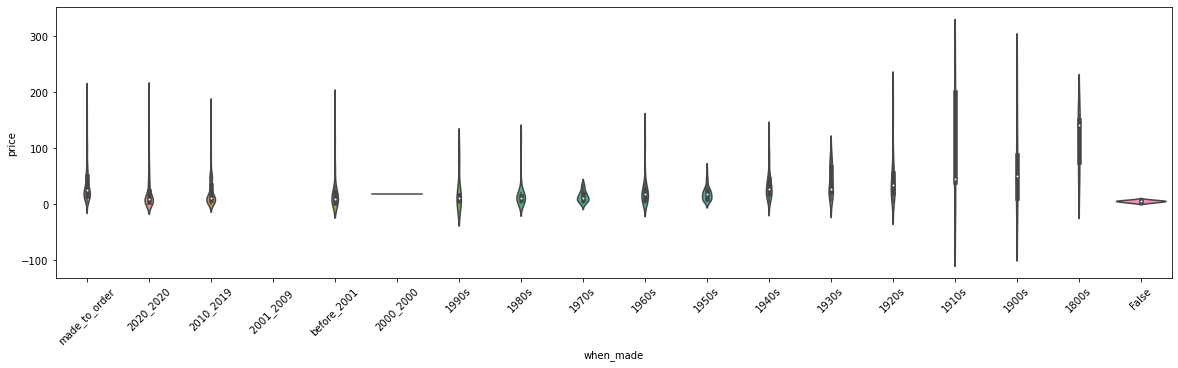

In [24]:
plt.figure(figsize = [20,5])
sb.violinplot(data = listings_sub, x = "when_made", y = "price")
plt.xticks(rotation = 45)
;

Price variations tend to widen the older a product is.

#### Compare Number of Favorers with Views

''

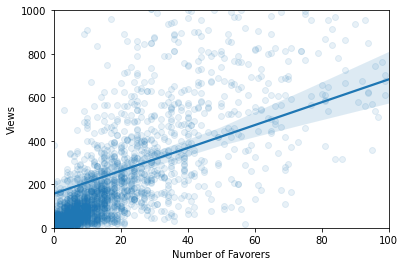

In [25]:
sb.regplot(data = listings_sub, x = 'num_favorers', y = 'views', scatter_kws={'alpha':0.1})
plt.xlabel('Number of Favorers')
plt.ylabel('Views')
plt.xlim(0,100)
plt.ylim(0,1000)
;

In [26]:
listings_sub.head()

,listing_id,title,description,price,currency_code,quantity,views,num_favorers,when_made
1,573652142.0,"Vintage Christmas Accordion Bell, Vintage Red ...","Vintage Christmas Accordion Bell, Vintage Red ...",6.97,USD,2.0,93.0,12.0,1950s
6,603071001.0,Crepe paper peonies stem Paper anniversary Peo...,Perfect for any occasion! A great way to make ...,30.00,USD,2.0,388.0,41.0,made_to_order
7,672229650.0,Set of 3 Purple Paper Helleborus - Paper Flowe...,Freshen up and brighten your home or office wi...,68.00,USD,1.0,122.0,21.0,2020_2020
8,585898784.0,Snowdrops Bouquet - Crepe Paper Flowers - Pape...,Freshen up and brighten your home or office wi...,98.00,USD,1.0,1170.0,40.0,2010_2019
9,585836036.0,Set of 3 Pink Open Paper Ranunculus - Pink Ran...,The Ranunculus Paper Flowers are suitablе to b...,45.00,USD,1.0,170.0,13.0,2010_2019


There is a slight positive correlation between number of views and favorites.

#### Average Price by Material Type - Comparing Wedding Products with Non-Wedding Products

In [27]:
# Create a new column that identifies whether or not a product is for weddings or not.
wedding_products = listings['description'].str.contains(r'wedding|bridal|bride')
listings['weddings'] = wedding_products
listings_sub = listings.copy().query('0 < price <= 200')
listings_sub.head()

,listing_id,title,description,price,currency_code,quantity,views,num_favorers,when_made,weddings
1,573652142.0,"Vintage Christmas Accordion Bell, Vintage Red ...","Vintage Christmas Accordion Bell, Vintage Red ...",6.97,USD,2.0,93.0,12.0,1950s,False
6,603071001.0,Crepe paper peonies stem Paper anniversary Peo...,Perfect for any occasion! A great way to make ...,30.00,USD,2.0,388.0,41.0,made_to_order,True
7,672229650.0,Set of 3 Purple Paper Helleborus - Paper Flowe...,Freshen up and brighten your home or office wi...,68.00,USD,1.0,122.0,21.0,2020_2020,False
8,585898784.0,Snowdrops Bouquet - Crepe Paper Flowers - Pape...,Freshen up and brighten your home or office wi...,98.00,USD,1.0,1170.0,40.0,2010_2019,False
9,585836036.0,Set of 3 Pink Open Paper Ranunculus - Pink Ran...,The Ranunculus Paper Flowers are suitablе to b...,45.00,USD,1.0,170.0,13.0,2010_2019,False


In [28]:
listings_sub.weddings.value_counts()

False    2485
True     1233
Name: weddings, dtype: int64

''

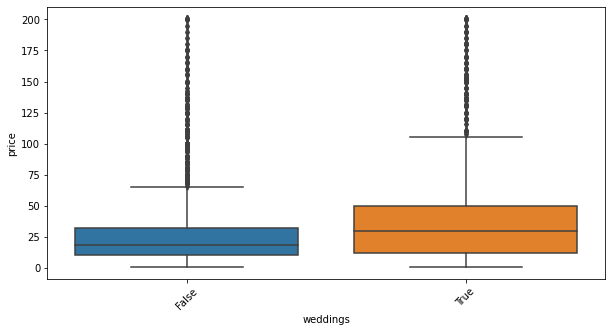

In [29]:
plt.figure(figsize = [10,5])
sb.boxplot(data = listings_sub, x = "weddings", y = "price")
plt.xticks(rotation = 45)
;

''

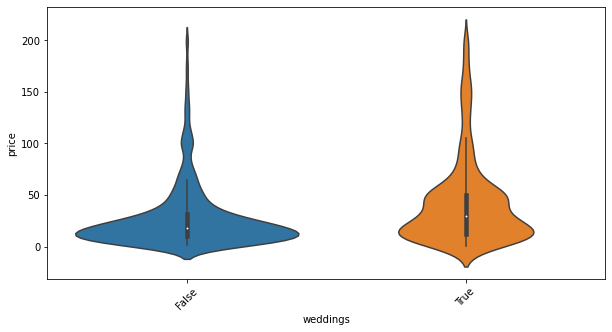

In [30]:
plt.figure(figsize = [10,5])
sb.violinplot(data = listings_sub, x = "weddings", y = "price")
plt.xticks(rotation = 45)
;

On average, wedding products have higher mean prices.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was a little surprising to see that number of favorers didn't track a little stronger with number of views. It was not surprising to see wider price variations for vintage products because these products may be in various conditions. Particularly with this plot, you can also see a slightly higher mean for products that are made to order versus pre-made products (compared to products made after 2020).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I only observed relationships between variables on interests, but it was interesting to discover how many products were available for weddings.

## Multivariate Exploration


### Compare average prices of Made to Order and Premade Products, for wedding and non-wedding products

In [31]:
# Reinstating the encoding of categorical data types for when_made column
when_made = ['made_to_order','2020_2020','2010_2019','2001_2009 ','before_2001','2000_2000','1990s','1980s','1970s',
             '1960s','1950s','1940s','1930s','1920s','1910s','1900s','1800s','False']

madeclasses = pd.api.types.CategoricalDtype(ordered = True, categories = when_made)

listings_sub['when_made'] = listings_sub['when_made'].loc[:].astype(madeclasses)

In [32]:
listings_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718 entries, 1 to 4749
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   listing_id     3718 non-null   float64 
 1   title          3718 non-null   object  
 2   description    3718 non-null   object  
 3   price          3718 non-null   float64 
 4   currency_code  3718 non-null   object  
 5   quantity       3718 non-null   float64 
 6   views          3718 non-null   float64 
 7   num_favorers   3718 non-null   float64 
 8   when_made      3658 non-null   category
 9   weddings       3718 non-null   bool    
dtypes: bool(1), category(1), float64(5), object(3)
memory usage: 429.4+ KB


In [33]:
listings_sub['when_made_sum'] = listings_sub['when_made'].replace(to_replace = {'2020_2020': 'premade',
                                                                                '2010_2019': 'premade',
                                                                                '2001_2009': 'premade',
                                                                                'before_2001': 'premade',
                                                                                '2000_2000': 'premade',
                                                                                '1990s': 'premade',
                                                                                '1980s': 'premade',
                                                                                '1970s': 'premade',
                                                                                '1960s': 'premade',
                                                                                '1950s': 'premade',
                                                                                '1940s': 'premade',
                                                                                '1930s': 'premade',
                                                                                '1920s': 'premade',
                                                                                '1910s': 'premade',
                                                                                '1900s': 'premade',
                                                                                '1800s': 'premade'})

In [34]:
listings_sub['when_made_sum'].value_counts()

made_to_order    2030
premade          1621
False               7
Name: when_made_sum, dtype: int64

In [35]:
listings_sub.head()

,listing_id,title,description,price,currency_code,quantity,views,num_favorers,when_made,weddings,when_made_sum
1,573652142.0,"Vintage Christmas Accordion Bell, Vintage Red ...","Vintage Christmas Accordion Bell, Vintage Red ...",6.97,USD,2.0,93.0,12.0,1950s,False,premade
6,603071001.0,Crepe paper peonies stem Paper anniversary Peo...,Perfect for any occasion! A great way to make ...,30.00,USD,2.0,388.0,41.0,made_to_order,True,made_to_order
7,672229650.0,Set of 3 Purple Paper Helleborus - Paper Flowe...,Freshen up and brighten your home or office wi...,68.00,USD,1.0,122.0,21.0,2020_2020,False,premade
8,585898784.0,Snowdrops Bouquet - Crepe Paper Flowers - Pape...,Freshen up and brighten your home or office wi...,98.00,USD,1.0,1170.0,40.0,2010_2019,False,premade
9,585836036.0,Set of 3 Pink Open Paper Ranunculus - Pink Ran...,The Ranunculus Paper Flowers are suitablе to b...,45.00,USD,1.0,170.0,13.0,2010_2019,False,premade


''

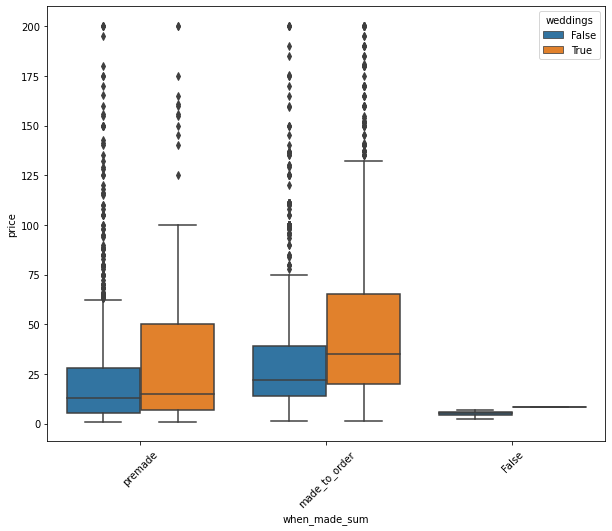

In [36]:
plt.figure(figsize = [10,8])
sb.boxplot(data = listings_sub, x = "when_made_sum", y = "price", hue = 'weddings')
plt.xticks(rotation = 45)
;

Across all when made categories, wedding products have higher average prices.

### See relationship between prices and views with encodings for wedding and non-wedding products

''

<Figure size 720x720 with 0 Axes>

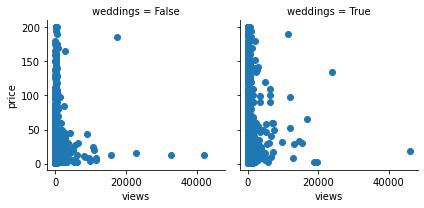

In [37]:
plt.figure(figsize = [10,10])
g = sb.FacetGrid(data = listings_sub, col='weddings', col_wrap = 2)
g.map(plt.scatter, 'views', 'price')
;

There's a stronger relationship between a low view count and non-wedding products. This data might be skewed by a potential bias towards recently-listed data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The second multivariate plot that ompares the relationship bwteen price and numbers of views for weddding and non-wedding products shows that the type of product (at least in terms of this distinction) does not significantly strengthen the already weak relationship between price and views.

### Were there any interesting or surprising interactions between features?

It was surprising to see that there is a greater difference in the average price of wedding and non-wedding prices for made to order products than there was in pre made products.